### **Insurance Claim Integrity Predictor**

### **1. Introduction**
**Problem Statement:**

Insurance fraud, a deliberate and unlawful act committed to gain financial advantage, poses a significant challenge for insurance companies. It leads to the wasteful expenditure of billions of dollars each year. Despite ongoing efforts, this issue remains inadequately addressed. Traditional methods of fraud detection are often slow and insufficient. Consequently, there is a pressing need for more efficient and accurate solutions.


**Objective:**

Develop a machine learning-based model to accurately identify whether an insurance claim is fraudulent or legitimate.



### **Data Load**

In [63]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px   
%matplotlib inline
import warnings                
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv("insurance_claims.csv").drop(columns="_c39")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### **Data Cleaning**

#### **1. Check Missing Values**
---

In [65]:
data.shape

(1000, 39)

In [66]:
data.replace('?',np.nan,inplace=True)

In [67]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes, 
                         'amount_unique':data.nunique(), 
                         'unique_values':[data[x].unique() for x in data.columns],
                         'null_values':data.isna().sum(),
                         'percentage_null_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data).sort_values("null_values", ascending=False)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
property_damage,object,2,"[YES, nan, NO]",360,36.0
police_report_available,object,2,"[YES, nan, NO]",343,34.3
collision_type,object,3,"[Side Collision, nan, Rear Collision, Front Co...",178,17.8
authorities_contacted,object,4,"[Police, nan, Fire, Other, Ambulance]",91,9.1
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,0.0
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,0.0
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,0.0
policy_deductable,int64,3,"[1000, 2000, 500]",0,0.0
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,0.0
policy_state,object,3,"[OH, IN, IL]",0,0.0


**Key takeaways :**
- Dataset consists of 1000 rows and 39 features
- Dataset has null/missing value in `property_damage`, `police_report_available`, and `collision_type` columns

#### **2. Data Imputation**
---

In [68]:
data['property_damage'].value_counts()

property_damage
NO     338
YES    302
Name: count, dtype: int64

In [69]:
data['police_report_available'].value_counts()

police_report_available
NO     343
YES    314
Name: count, dtype: int64

In [70]:
data['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
Name: count, dtype: int64

Text(0.5, 1.0, 'Collision Type')

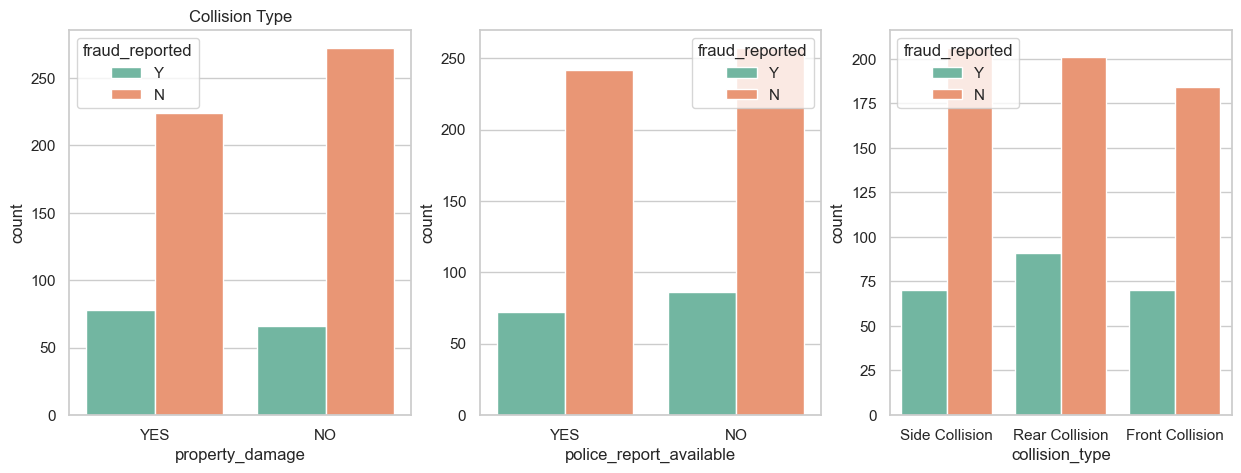

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data = data, x = 'property_damage', hue=data['fraud_reported'], palette= 'Set2', ax=axes[0])
axes[0].set_title('Property Damage')
sns.countplot(data = data, x = 'police_report_available',hue=data['fraud_reported'], palette= 'Set2',
              ax=axes[1])
axes[0].set_title('Police Report Available')
sns.countplot(data = data, x = 'collision_type',hue=data['fraud_reported'], palette= 'Set2', ax=axes[2])
axes[0].set_title('Collision Type')

In [82]:
for column in data.columns:
    mode_value = data[column].mode().iloc[0]
    data[column] = data[column].replace(np.nan, mode_value)

Text(0.5, 1.0, 'Collision Type')

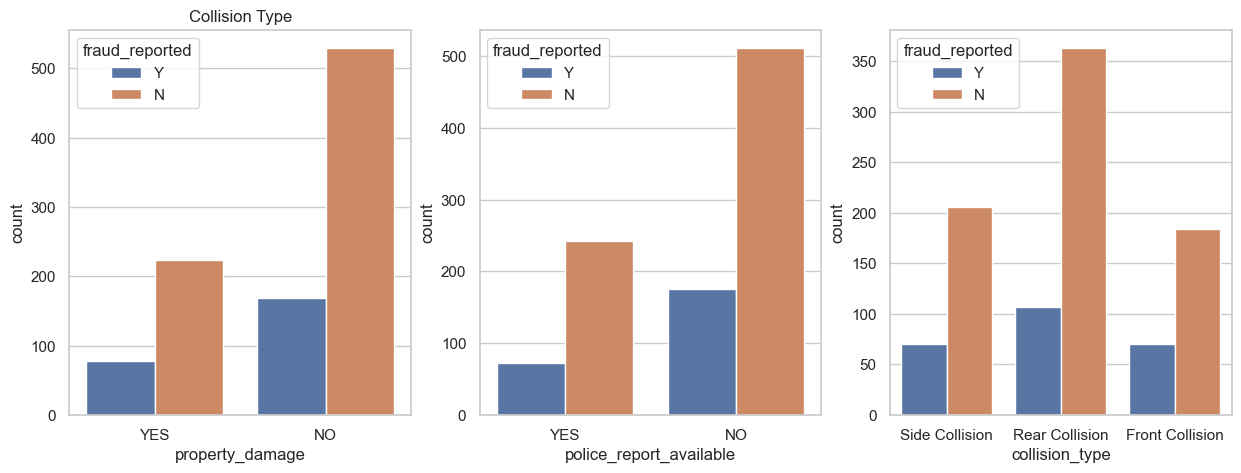

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data = data, x = 'property_damage', hue=data['fraud_reported'], ax=axes[0])
axes[0].set_title('Property Damage')
sns.countplot(data = data, x = 'police_report_available',hue=data['fraud_reported'], 
              ax=axes[1])
axes[0].set_title('Police Report Available')
sns.countplot(data = data, x = 'collision_type',hue=data['fraud_reported'], ax=axes[2])
axes[0].set_title('Collision Type')

In [84]:
data.duplicated().sum()

np.int64(0)

In [85]:
check_data(data)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,0.0
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,0.0
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,0.0
policy_bind_date,object,951,"[2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...",0,0.0
policy_state,object,3,"[OH, IN, IL]",0,0.0
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,0.0
policy_deductable,int64,3,"[1000, 2000, 500]",0,0.0
policy_annual_premium,float64,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",0,0.0
umbrella_limit,int64,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",0,0.0
insured_zip,int64,995,"[466132, 468176, 430632, 608117, 610706, 47845...",0,0.0


**Key takeaways :**
- Dataset that have null/missing values are imputed with the mode value of each feature
- Dataset with no duplicate values

### **Exploratory Data Analysis**

#### **1. Data Overview**
---

In [86]:
# check the numbers of rows and features
data.shape

(1000, 39)

In [87]:
check_data(data)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,0.0
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,0.0
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,0.0
policy_bind_date,object,951,"[2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...",0,0.0
policy_state,object,3,"[OH, IN, IL]",0,0.0
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,0.0
policy_deductable,int64,3,"[1000, 2000, 500]",0,0.0
policy_annual_premium,float64,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",0,0.0
umbrella_limit,int64,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",0,0.0
insured_zip,int64,995,"[466132, 468176, 430632, 608117, 610706, 47845...",0,0.0


In [88]:
numeric = []
category = []
for col in data.columns:
  if data[col].dtype != object:
    numeric.append(col)
  elif data[col].dtype == object:
    category.append(col)

print(f'Number of numerical features   :{len(numeric)}')
print(f'Number of categorical features :{len(category)}')

Number of numerical features   :18
Number of categorical features :21


**Key takeaways :**
- Dataset with no null/missing value
- Dataset consists 18 numerical features and 21 categorical features

#### **2. Statistical Summary**
---

In [89]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.95,115.11,0.00,115.75,199.5,276.25,479.00
age,1000.0,38.95,9.14,19.00,32.00,38.0,44.00,64.00
policy_number,1000.0,546238.65,257063.01,100804.00,335980.25,533135.0,759099.75,999435.00
policy_deductable,1000.0,1136.00,611.86,500.00,500.00,1000.0,2000.00,2000.00
policy_annual_premium,1000.0,1256.41,244.17,433.33,1089.61,1257.2,1415.70,2047.59
umbrella_limit,1000.0,1101000.00,2297406.60,-1000000.00,0.00,0.0,0.00,10000000.00
insured_zip,1000.0,501214.49,71701.61,430104.00,448404.50,466445.5,603251.00,620962.00
capital-gains,1000.0,25126.10,27872.19,0.00,0.00,0.0,51025.00,100500.00
capital-loss,1000.0,-26793.70,28104.10,-111100.00,-51500.00,-23250.0,0.00,0.00
incident_hour_of_the_day,1000.0,11.64,6.95,0.00,6.00,12.0,17.00,23.00


In [90]:
data[category].describe().T.round(2)

,count,unique,top,freq
policy_bind_date,1000,951,2006-01-01,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2015-02-02,28
incident_type,1000,4,Multi-vehicle Collision,419


Key takeaways:
- Majority of customers **not fraud**

#### **4. Analyzing Feature**
---

##### **1. Target Variable**

Text(0.5, 1.0, 'Percentages of Customer Fraud')

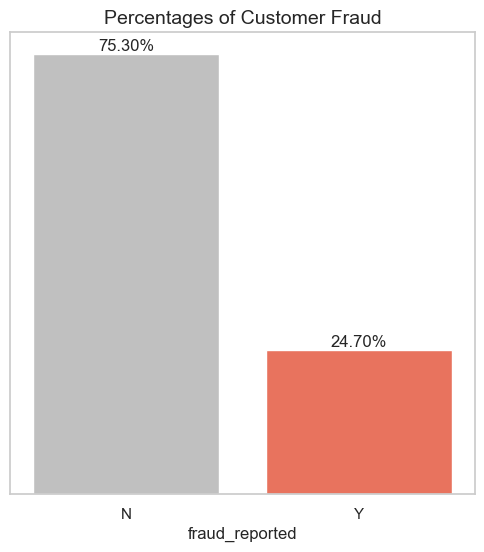

In [91]:
plt.figure(figsize=(6, 6))
counts = data['fraud_reported'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette =['silver', 'tomato'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of Customer Fraud', fontsize=14)

##### **2. Univariate Analysis**

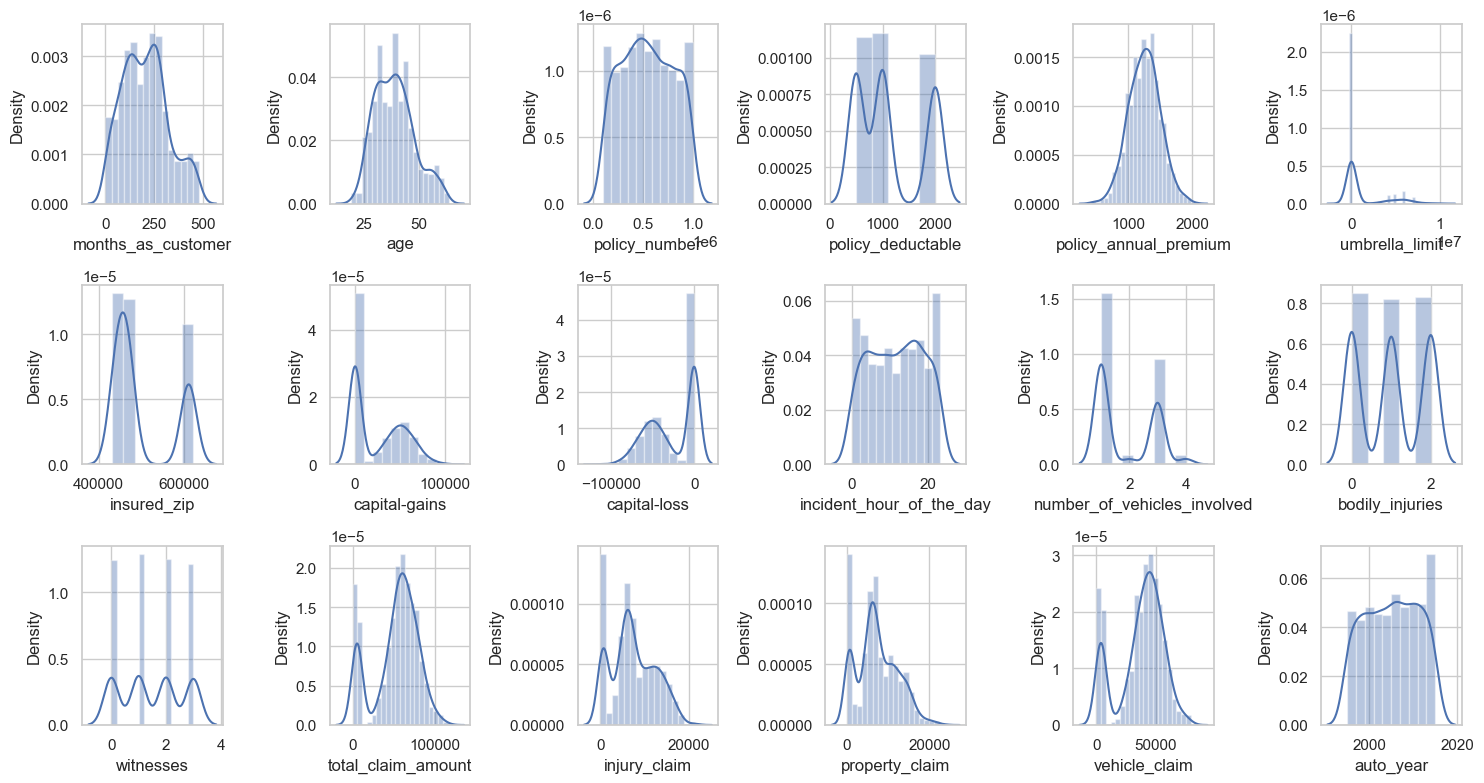

In [92]:
plt.figure(figsize=(15, 8))
for i in range(0, len(numeric)):
    plt.subplot(3, 6, i+1)
    sns.distplot(data[numeric[i]])
    plt.tight_layout()

Key takeaways:
- Overall the data is **not normally distributed**. 
- There is only **one feature** that is **normally distributed** which is `policy_annual_premium` and others tend to have bimodal and multimodal distributions

##### **3. Bivariate Analysis**

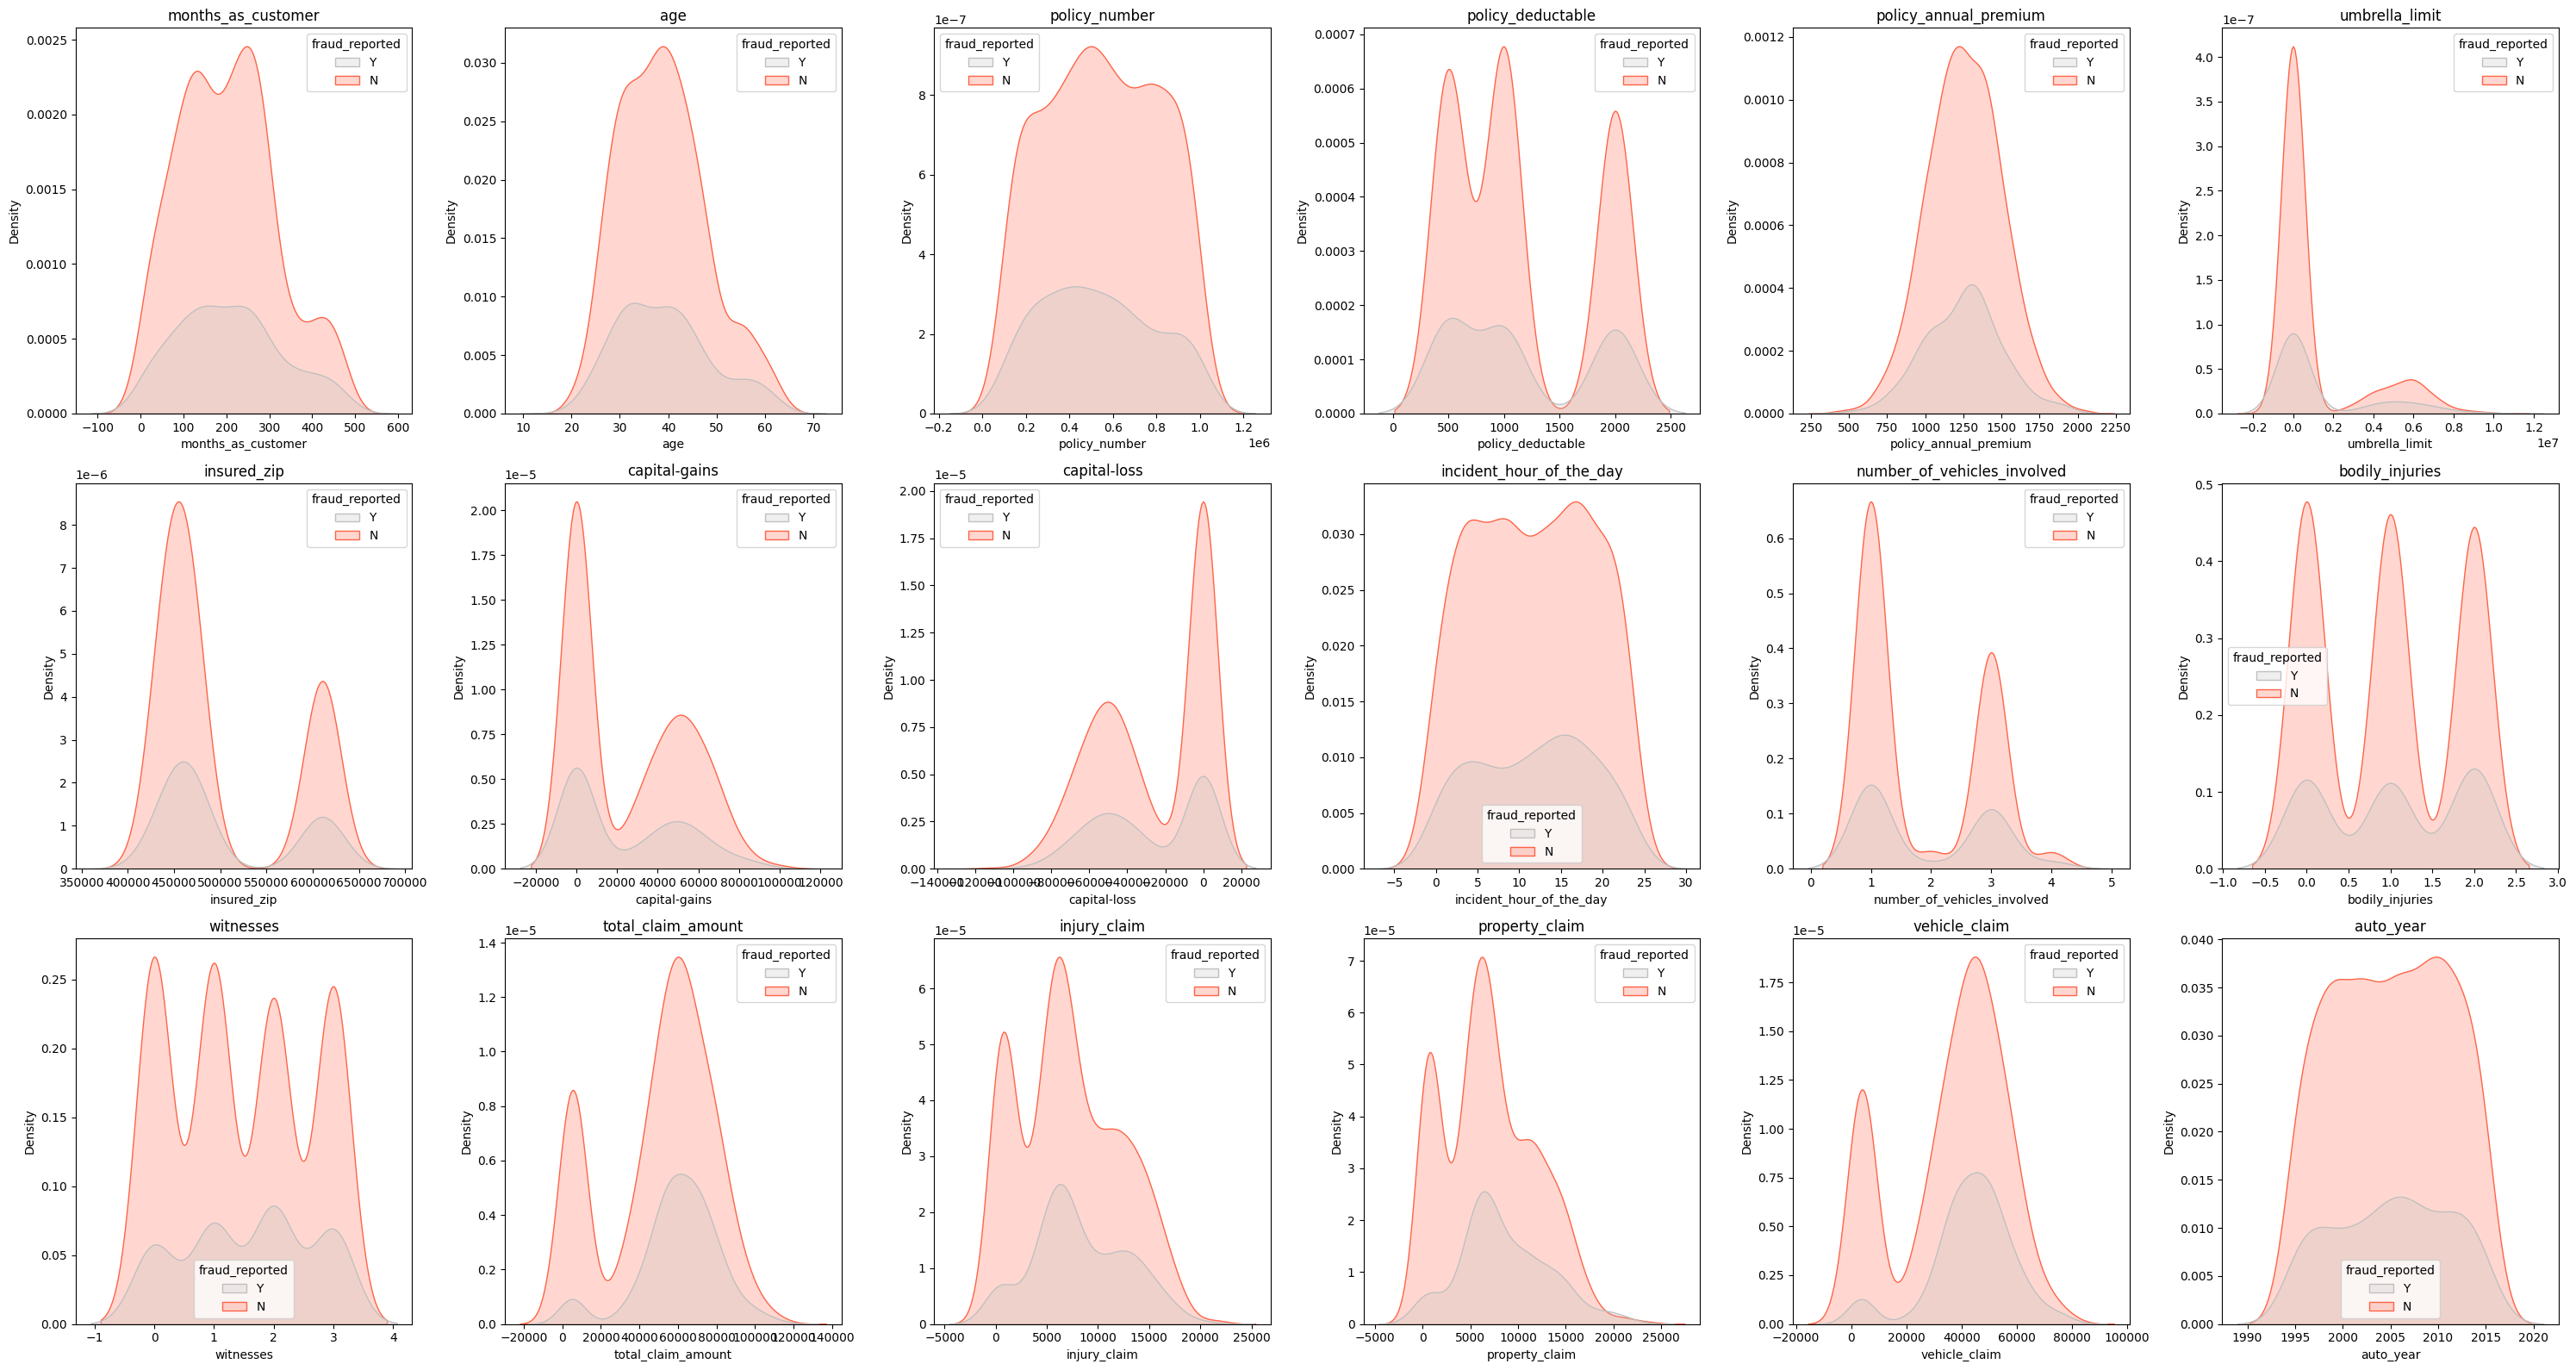

In [22]:
plt.figure(figsize=(30, 16))
for i in range(0, len(numeric)):
    plt.subplot(3, 6, i+1)
    sns.kdeplot(data = data, x = data[numeric[i]], hue=data['fraud_reported'], 
                palette = ['silver', 'tomato'], fill=True).set(title=f'{numeric[i]}')
    plt.tight_layout()

In [23]:
# calculate ratio and pivoting
def ratio_with_target(feats):
    ratio_df = data.groupby([feats,'fraud_reported']).agg({'vehicle_claim':'count'}).reset_index()
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.vehicle_claim/x.vehicle_claim.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='fraud_reported', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Y'], ascending=False)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualization
def visualization(fitur, title):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # count
    ax[0].set_title(f'Fraud Reported by {title}\n', fontsize=14)
    sns.countplot(x=fitur, data = data, hue = 'fraud_reported', 
                  palette = ['silver', 'tomato'] , ax=ax[0],
                  order = data[fitur].value_counts('N').index)
    ax[0].bar_label(ax[0].containers[0], fontsize=14) 
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    # percentage
    ax[1].set_title(f'Ratio of Fraud Reported by {title}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, 
                                  color = ['tomato', 'silver'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, 
                                                           bottom+height/2), 
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

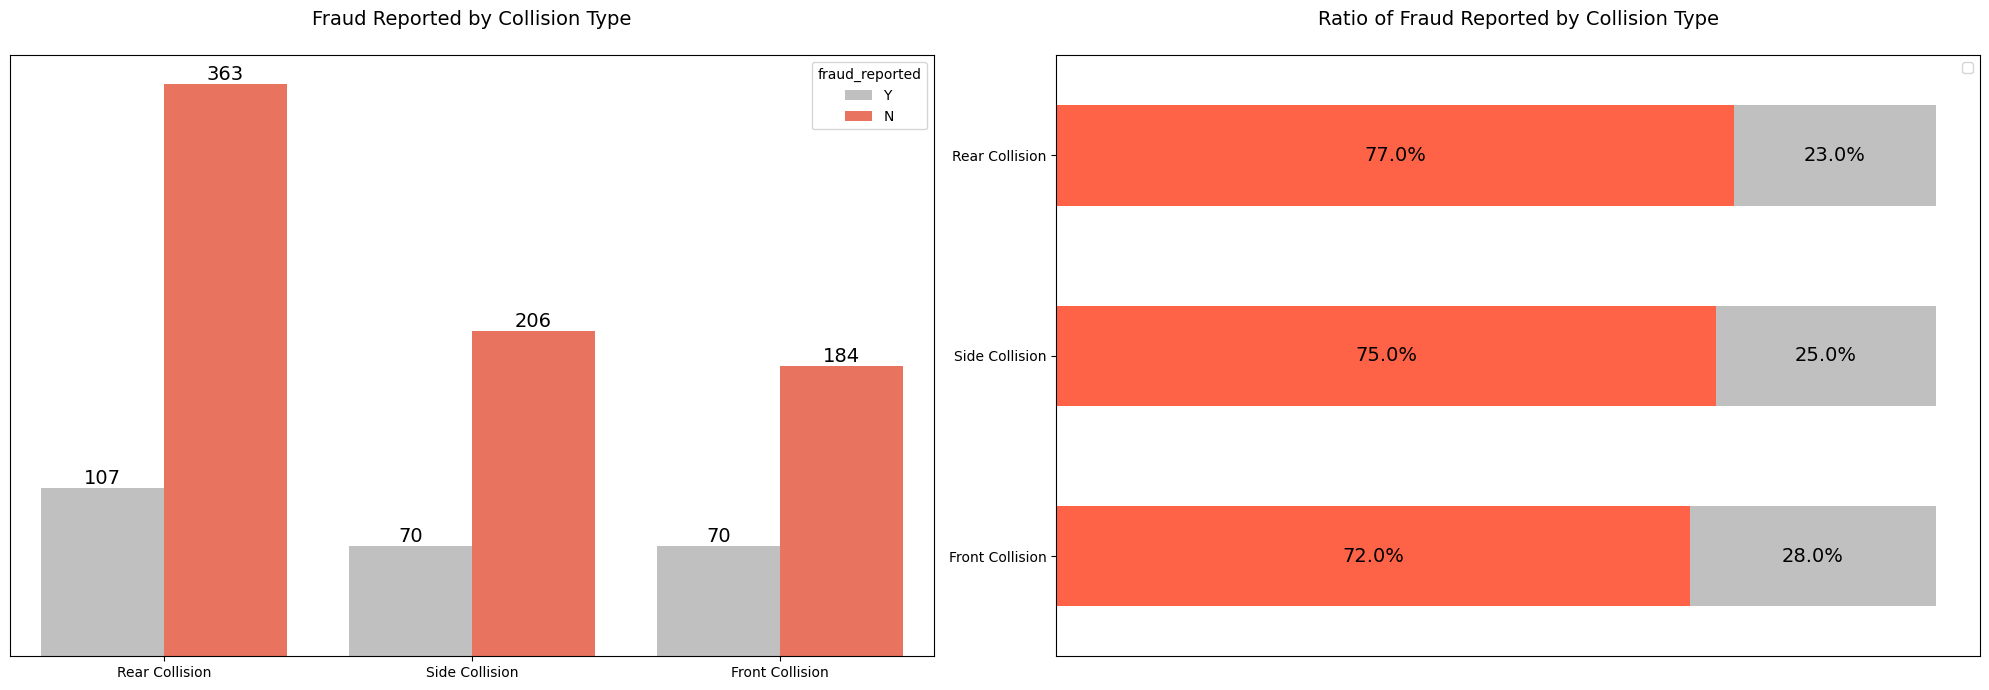

In [24]:
visualization('collision_type', 'Collision Type')

Key takeaways:
- Majority of customers using rear collision type 
- Ratio of fraud customers in each collision type is not much different from 23% - 28%

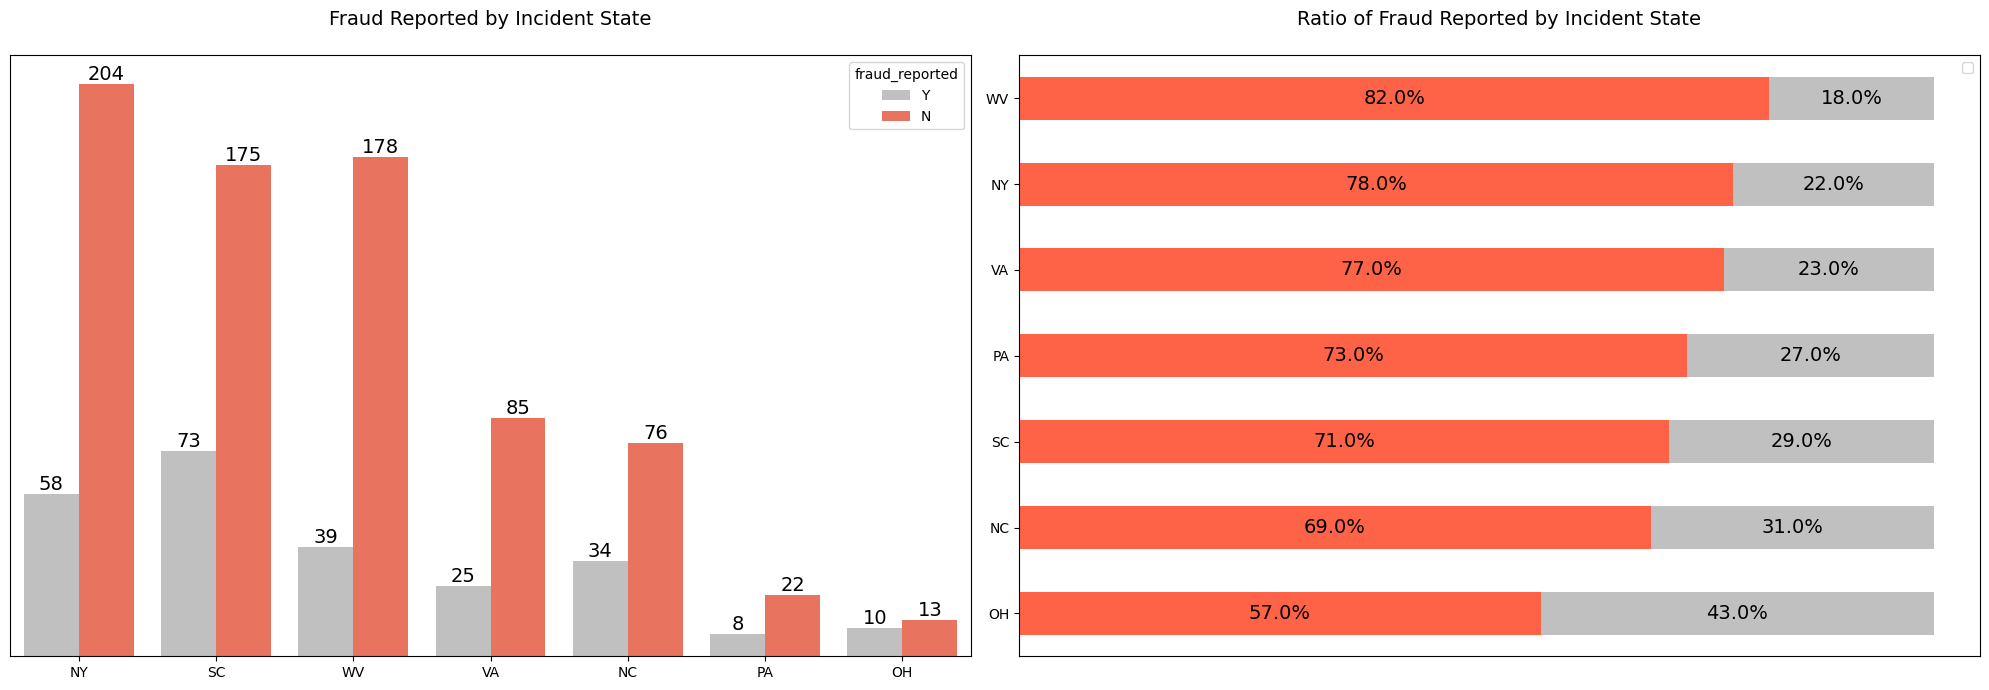

In [25]:
visualization('incident_state', 'Incident State')

Key takeaways:
- Although the number of customers who are in OH is quite low, 43% of them are fraud
- The fraud rate for customers other than in OH is 18% - 31%

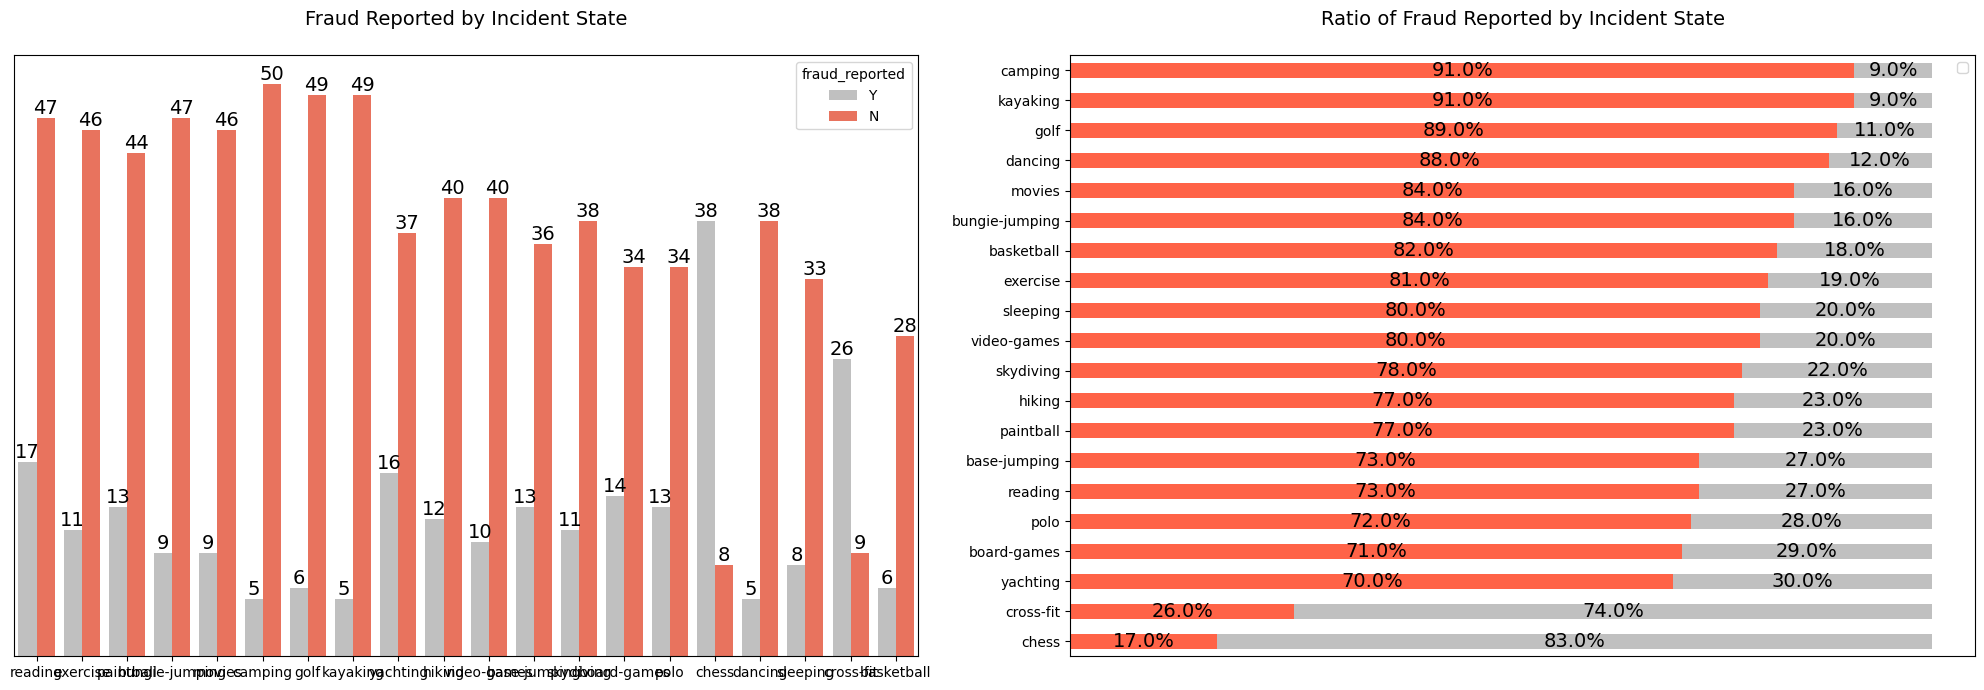

In [26]:
visualization("insured_hobbies", "Incident State")

Key takeaways:
- Similarly, although the number of users who have the hobbies of playing chess and cross-fit is quite low, these hobbies tend to have the highest churn rates of 83% and 74% compared to other hobbies.

##### **4. Multivariate Analysis**

In [27]:
numeric

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

##### **Policy**
---

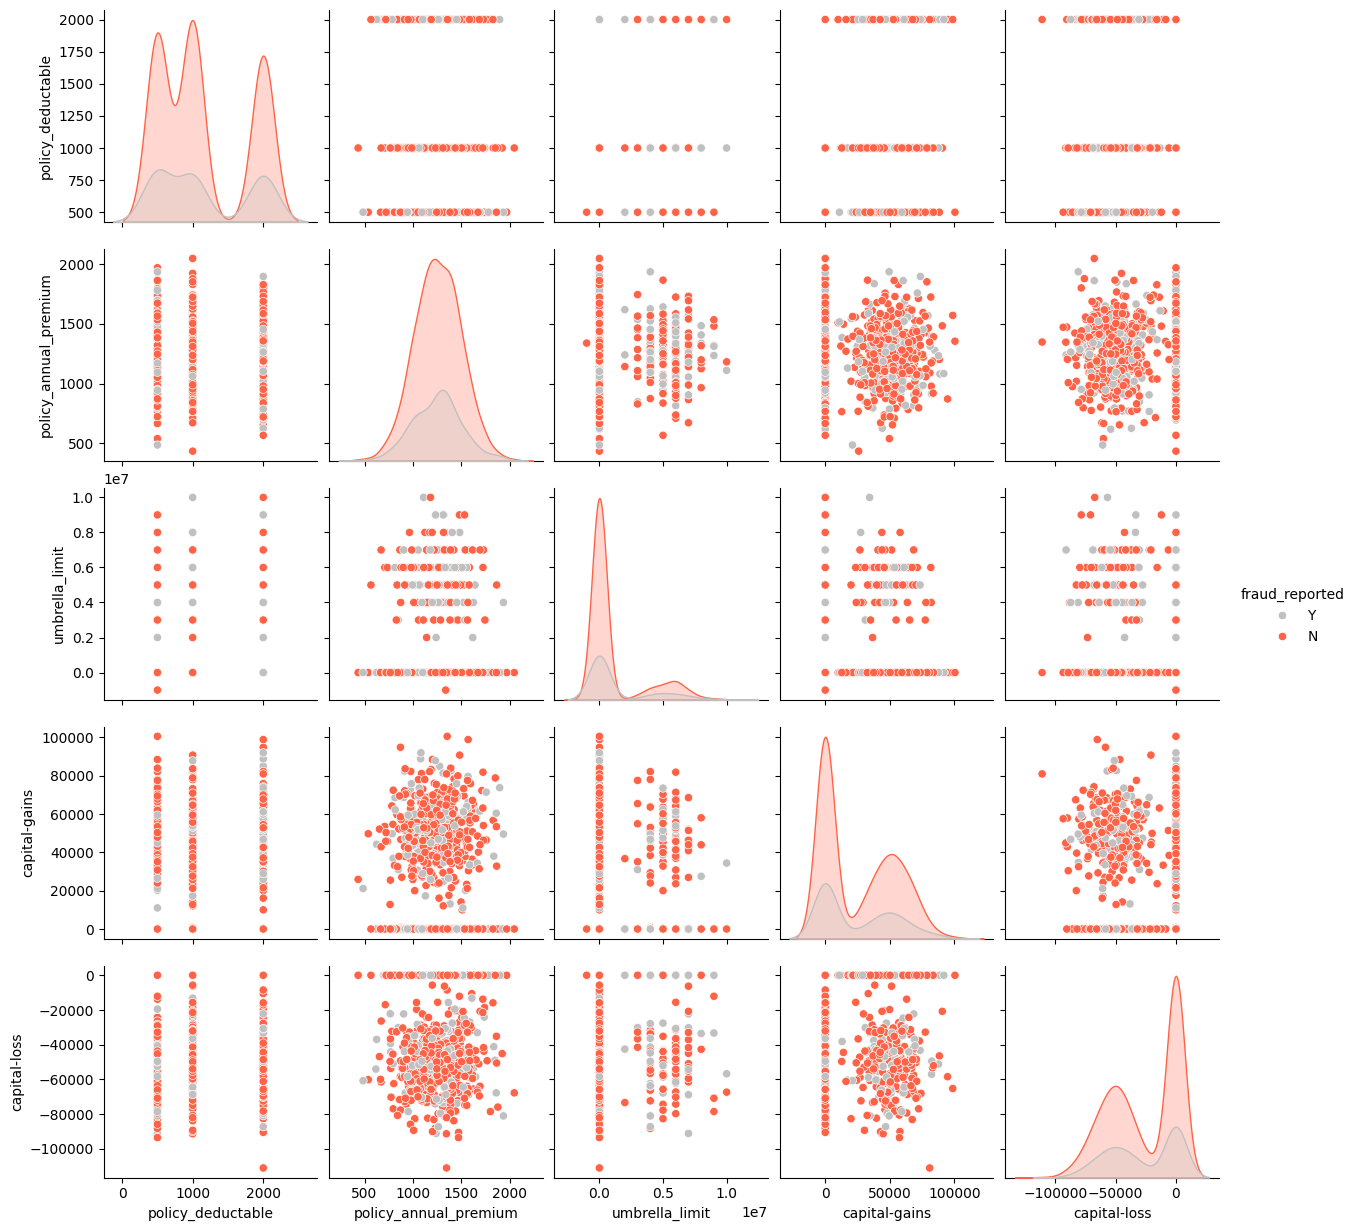

In [28]:
sns.pairplot(data[['policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                   'capital-gains', 'capital-loss', 'fraud_reported']], 
             hue = 'fraud_reported', palette=['silver', 'tomato'])

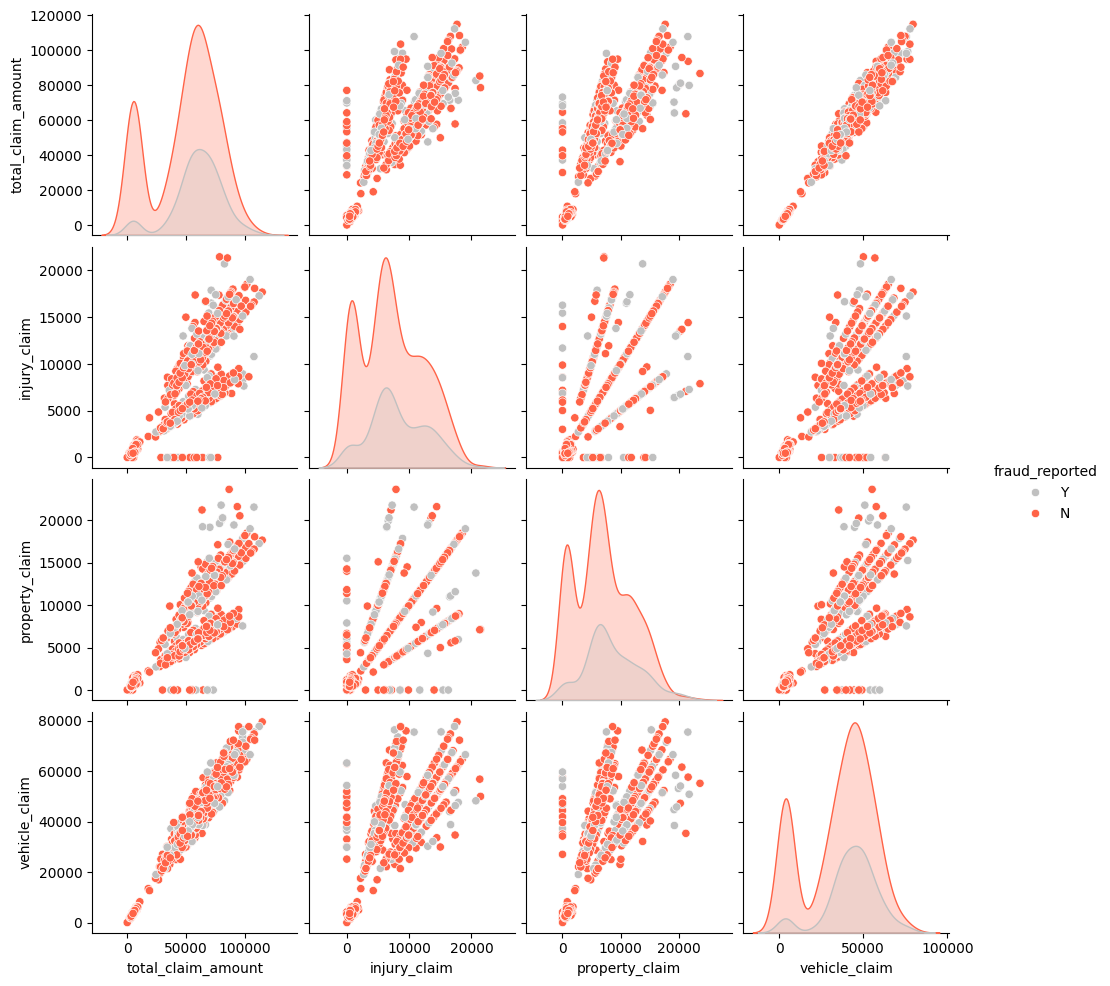

In [29]:
sns.pairplot(data[['total_claim_amount', 'injury_claim', 'property_claim', 
                   'vehicle_claim', 'fraud_reported']], 
             hue = 'fraud_reported', palette=['silver', 'tomato'])

### **Data Preprocessing**

#### **1. Handling Outlier**
---

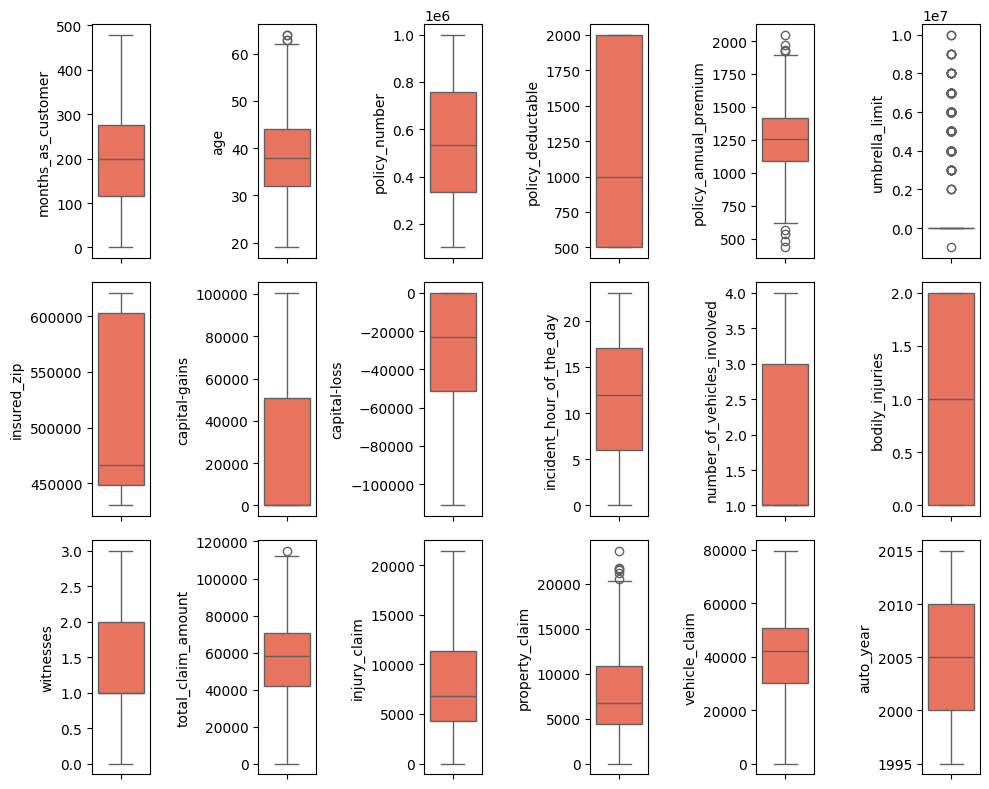

In [30]:
# check outlier
plt.figure(figsize=(10, 8))
for i in range (0,len(numeric)):
  plt.subplot(3, 6, i+1)
  num = numeric[i]
  sns.boxplot(y=data[num], color='tomato')
  plt.tight_layout()

Key takeaways:
- Overall, the data has a few outliers but they are still reasonable (not extreme values or anomalies that are suspected to be errors in data entry).
- Outliers are not handled

#### **2. Feature Encoding**
---

In [31]:
df = data.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# ----------------------
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

In [33]:
df['fraud_reported'].value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

#### **3. Feature Selection**
---

In [34]:
to_drop = ['policy_number','policy_bind_date','insured_zip','incident_location',
           'auto_year', 'auto_make', 'auto_model']
df.drop(columns=to_drop, inplace=True)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

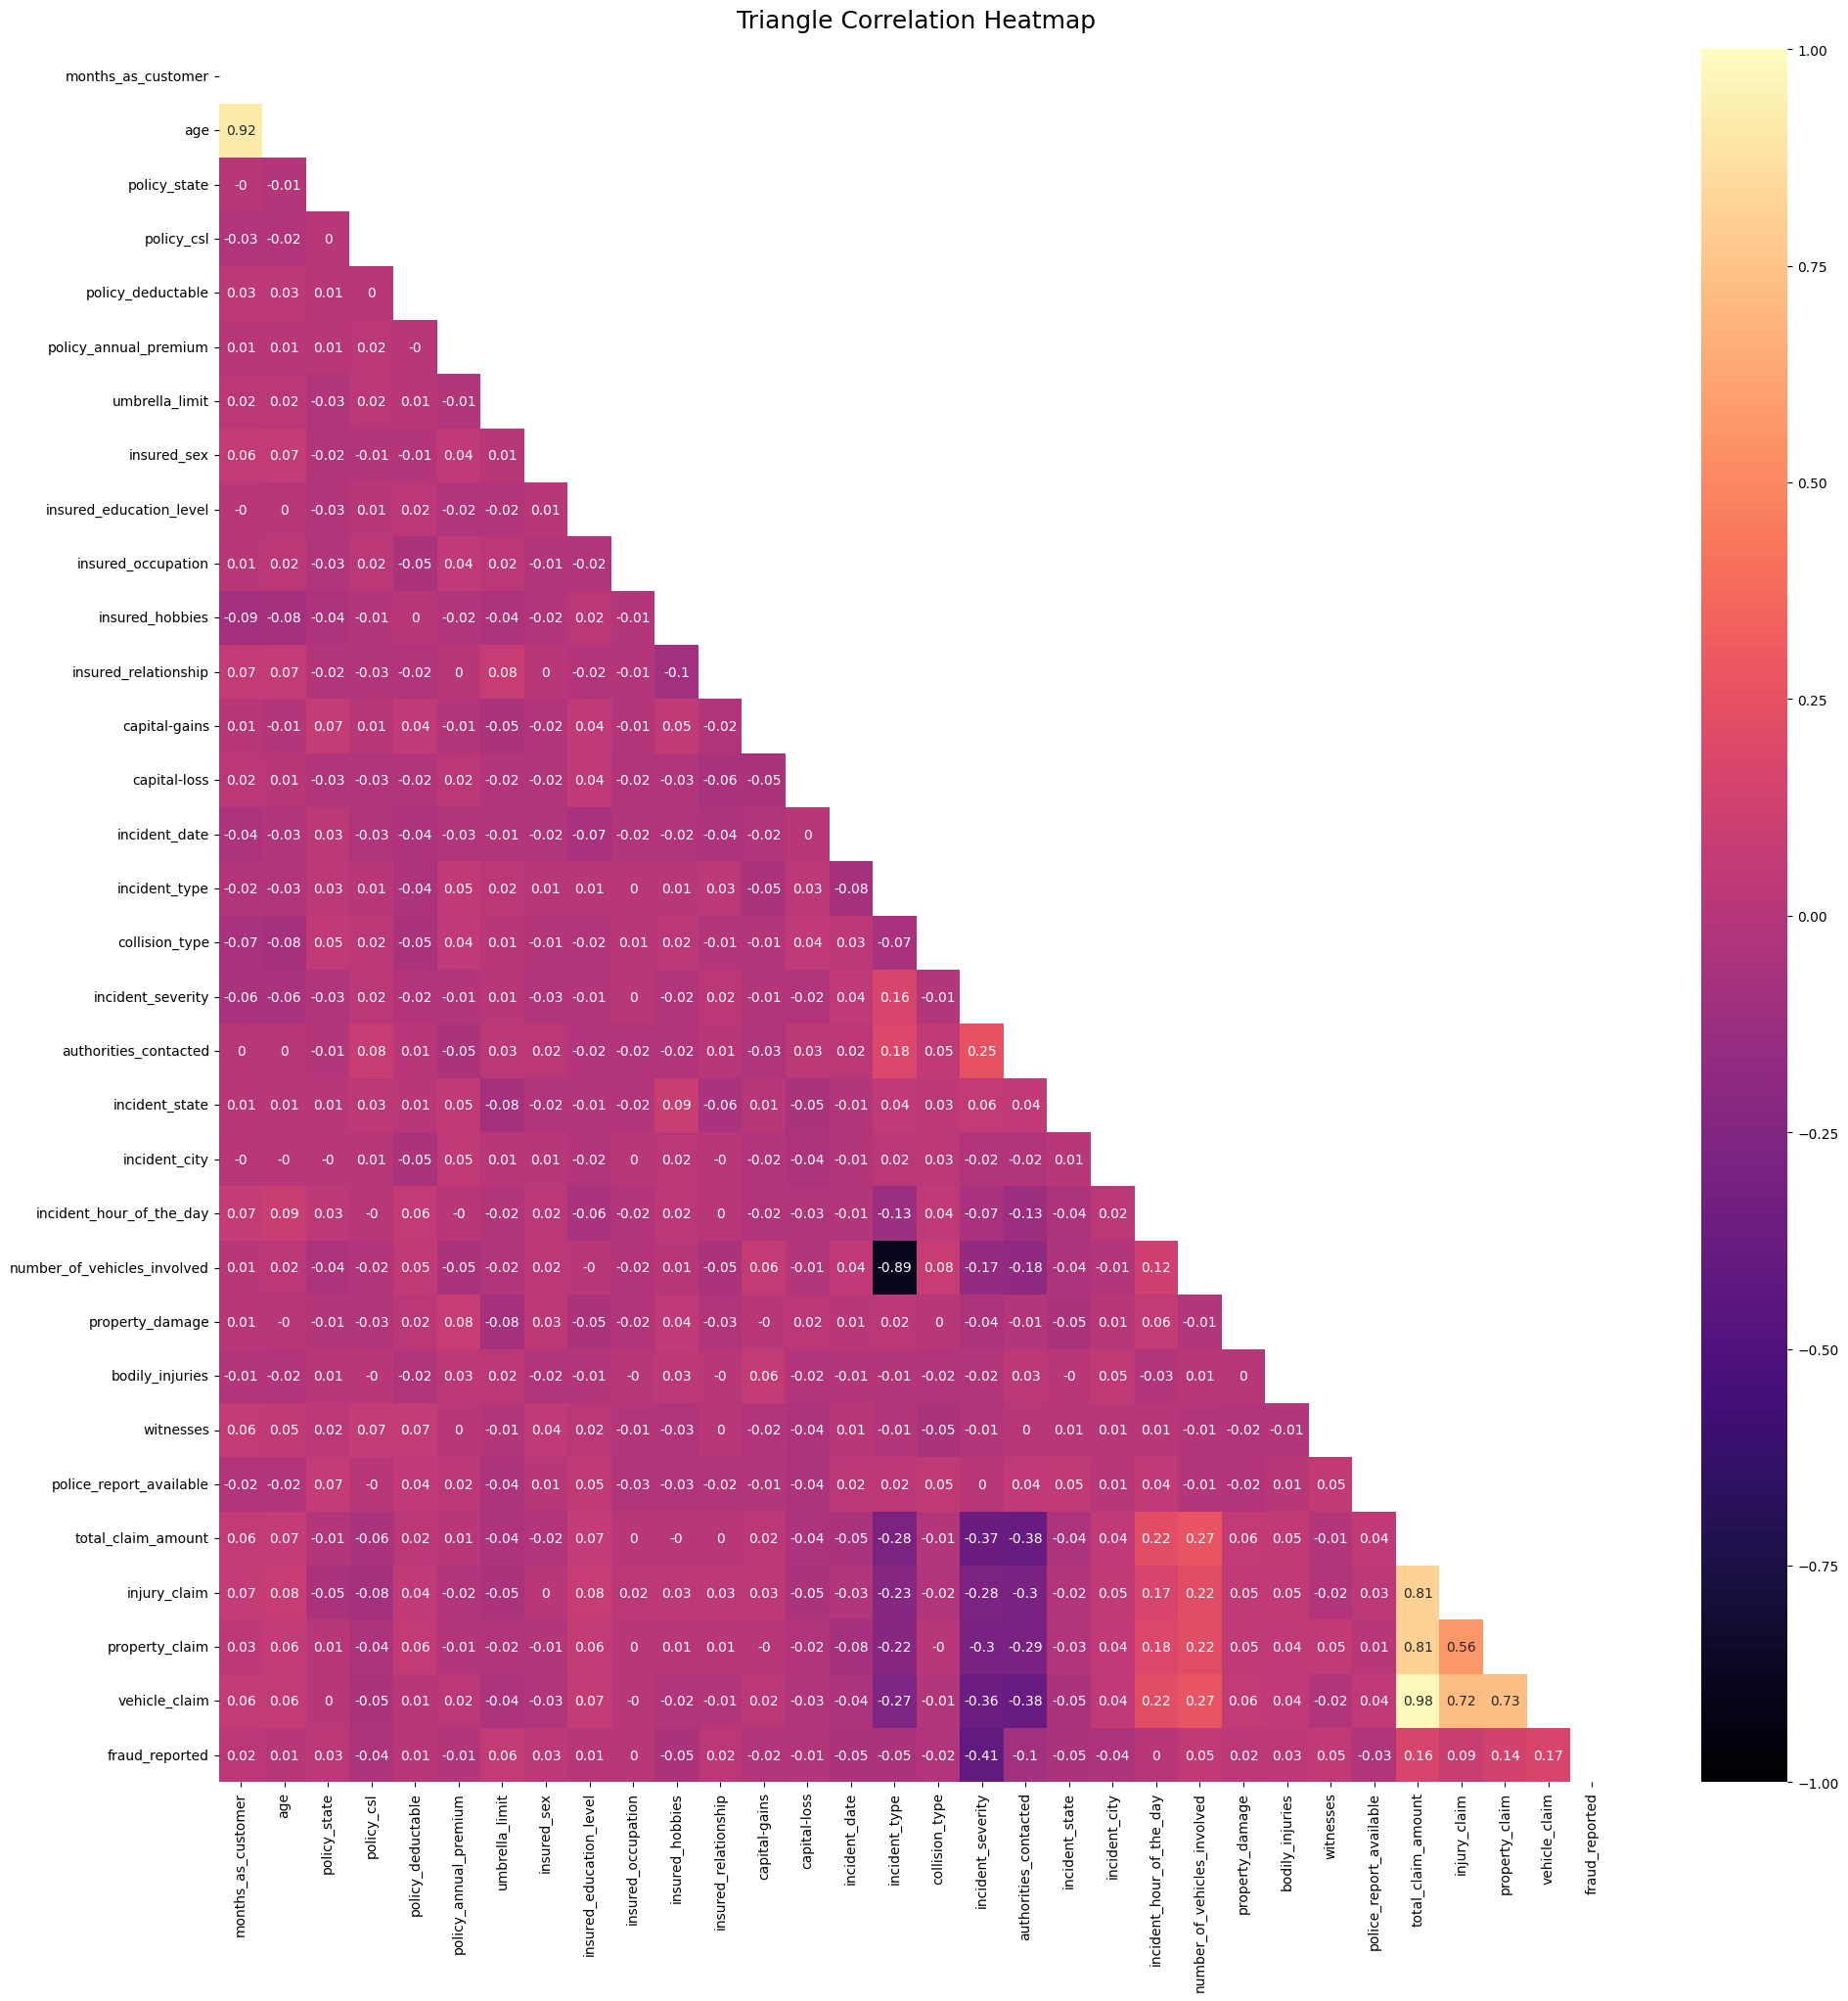

In [35]:
plt.figure(figsize=(23, 23))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool_))
heatmap = sns.heatmap(round(corr_matrix,2), mask=mask, vmin=-1, vmax=1, 
                      annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [36]:
to_drop = ['injury_claim', 'property_claim', 'vehicle_claim', 'incident_type', 'age',
           'incident_hour_of_the_day', 'insured_occupation']
df.drop(columns=to_drop, inplace=True)

In [37]:
df.corr().abs()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
incident_severity              0.405988
total_claim_amount             0.163651
authorities_contacted          0.099688
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_state                 0.051407
incident_date                  0.050710
witnesses                      0.049497
insured_hobbies                0.046838
incident_city                  0.040403
policy_csl                     0.037190
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
police_report_available        0.027768
insured_relationship           0.021043
months_as_customer             0.020544
capital-gains                  0.019173
collision_type                 0.017315
property_damage                0.017202
capital-loss                   0.014863
policy_deductable              0.014817
policy_annual_premium          0.014480
insured_education_level        0.008808


[0.06919147 0.01829797 0.01931895 0.01789008 0.06647013 0.02206499
 0.0104104  0.0342967  0.10287513 0.02923068 0.03833732 0.04068137
 0.06537787 0.01712479 0.19879406 0.02732121 0.03238509 0.03422382
 0.01652384 0.00982088 0.01867612 0.0244656  0.0094782  0.07674332]


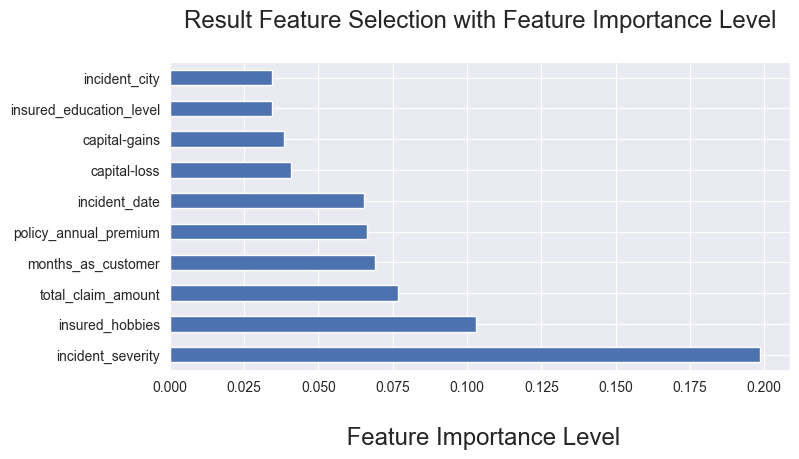

In [38]:
from sklearn.ensemble import RandomForestClassifier
# split features and target
X = df.iloc[:,:-1]              
Y = df['fraud_reported']    

# build model for feature importance
model = RandomForestClassifier(n_estimators=1000)
model.fit(X,Y)

# using feature_importances from tree based classifiers
print(model.feature_importances_) 

# visualize result of features importance level
sns.set({"figure.figsize":(8,4)})
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Result Feature Selection with Feature Importance Level\n", fontsize="xx-large")
plt.xlabel("\n Feature Importance Level", fontsize="xx-large")
plt.show()

In [39]:
final_feat = ["incident_severity","insured_hobbies","total_claim_amount",
              "months_as_customer","policy_annual_premium",
              "incident_date","capital-loss","capital-gains",
              "insured_education_level","incident_city","fraud_reported"]
data_new = df[final_feat]
data_new

,incident_severity,insured_hobbies,total_claim_amount,months_as_customer,policy_annual_premium,incident_date,capital-loss,capital-gains,insured_education_level,incident_city,fraud_reported
0,0,17,71610,328,1406.91,24,0,53300,4,1,1
1,1,15,5070,228,1197.22,20,0,0,4,5,1
2,1,2,34650,134,1413.14,52,0,35100,6,1,0
3,0,2,63400,256,1415.74,9,-62400,48900,6,0,1
4,1,2,6500,228,1583.91,47,-46000,66000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,13,87200,3,1310.80,52,0,0,5,4,0
996,0,17,108480,285,1436.79,23,0,70900,6,3,0
997,1,3,67500,130,1383.49,22,0,35100,5,0,0
998,0,0,46980,458,1356.92,56,0,0,0,0,0


##### **4. Split Train Test**
---

In [40]:
df_model = data_new.copy()
X = df_model.drop(columns='fraud_reported').copy()
y = df_model['fraud_reported'].copy()

In [41]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(700, 10) (300, 10)


In [42]:
y_train.value_counts()

fraud_reported
0    519
1    181
Name: count, dtype: int64

##### **5. Standardization**
---

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### **Modeling**

In [44]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # predict label in data testing
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    # model evaluation use classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    
    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

# --------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
def c_matrix_viz (model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # set labels for the matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    # visualization
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.8) # for label size
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12}, 
                yticklabels=['Not Fraud','Fraud'], xticklabels=['Not Fraud','Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# --------------------------------------------------------------------------------
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    sns.set_theme(style='whitegrid')
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

##### 1. Logistic Regression
---

In [45]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.6304
Std: 0.1195


##### Hyperparameter Tuning

In [46]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

# -------------------------------------------------------------------------------
model = LogisticRegression(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search_lr = model_selection.GridSearchCV(model, param_grid = params, 
                                              scoring = 'recall', cv = kfold)

grid_search_lr.fit(X_train, y_train)
print('Best parameters: ', grid_search_lr.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       234
           1       0.57      0.67      0.62        66

    accuracy                           0.82       300
   macro avg       0.74      0.76      0.75       300
weighted avg       0.83      0.82      0.82       300

------------------------------------------------------- 

AUC Test score: 0.7466
AUC Train scores: 0.7954
------------------------------------------------------- 



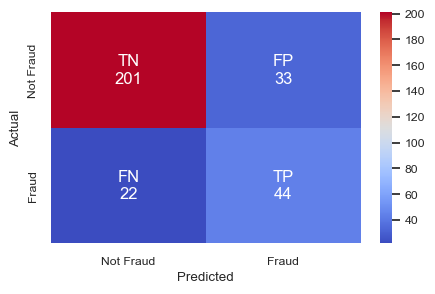

In [47]:
predict(grid_search_lr)

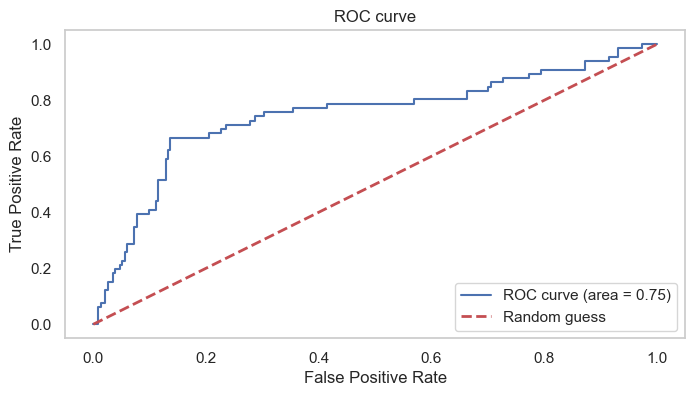

In [48]:
plot_roc(grid_search_lr, X_test, y_test)

##### **2. Random Forest**
---

In [49]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', rf_model.mean().round(4))
print('Std:', rf_model.std().round(4))

Recall Mean: 0.5797
Std: 0.1137


##### Hyperparameter Tuning

In [50]:
params ={'criterion' : ['gini', 'entropy'],
         'n_estimators': [100, 200, 300],
         'max_depth': [3, 5, 7, 10],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

# -------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_rf = model_selection.GridSearchCV(model, param_grid = params, 
                                              scoring = 'recall', cv = kfold)

grid_search_rf.fit(X_train, y_train)
print('Best parameters: ', grid_search_rf.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       234
           1       0.59      0.80      0.68        66

    accuracy                           0.83       300
   macro avg       0.76      0.82      0.78       300
weighted avg       0.86      0.83      0.84       300

------------------------------------------------------- 

AUC Test score: 0.8358
AUC Train scores: 0.9791
------------------------------------------------------- 



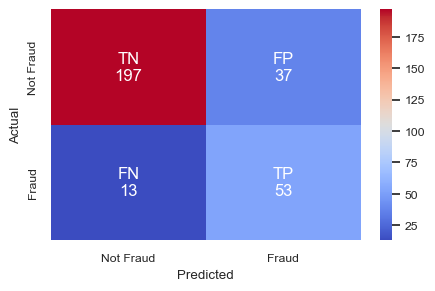

In [51]:
predict(grid_search_rf)

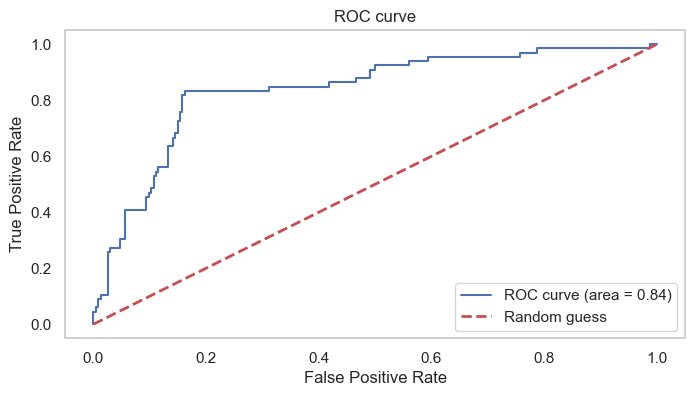

In [52]:
plot_roc(grid_search_rf, X_test, y_test)

##### **3. XGBOOST**
---

In [53]:
from sklearn import model_selection
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
xgb_model = model_selection.cross_val_score(xgb, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', xgb_model.mean().round(4))
print('Std:', xgb_model.std().round(4))

Recall Mean: 0.6188
Std: 0.1005


##### Hyperparameter Tuning

In [54]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [5, 10, 15] # set the class weight
}

# ----------------------------------------------------------------------
model = XGBClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_xgb = model_selection.GridSearchCV(model, 
                                               param_grid = params, scoring = 'recall', 
                                               cv = kfold)

grid_search_xgb.fit(X_train, y_train)
print('Best parameters: ', grid_search_xgb.best_params_)

Best parameters:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.22      1.00      0.36        66

    accuracy                           0.22       300
   macro avg       0.11      0.50      0.18       300
weighted avg       0.05      0.22      0.08       300

------------------------------------------------------- 

AUC Test score: 0.8479
AUC Train scores: 0.9165
------------------------------------------------------- 



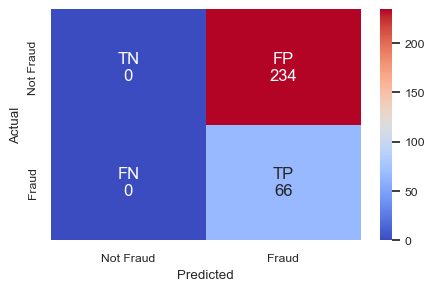

In [55]:
predict(grid_search_xgb)

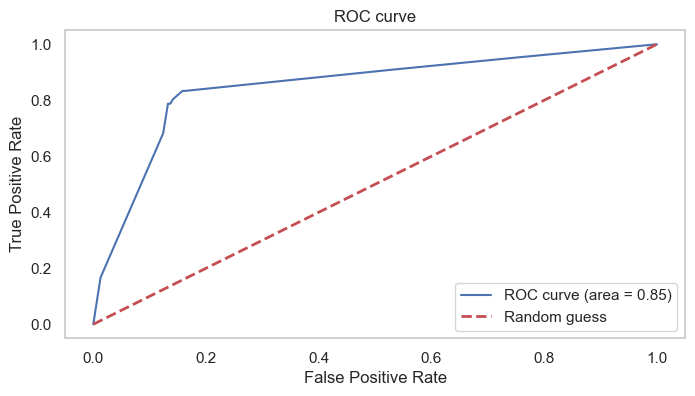

In [56]:
plot_roc(grid_search_xgb, X_test, y_test)

##### **4. K-Nearest Neighbor**
---

In [57]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
knn_model = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', knn_model.mean().round(4))
print('Std:', knn_model.std().round(4))

Recall Mean: 0.1191
Std: 0.055


##### Hyperparameter Tuning

In [58]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 1.5, 2]
}

# ----------------------------------------------------------------------
model = KNeighborsClassifier()
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_knn = model_selection.GridSearchCV(model, 
                                               param_grid = params, scoring = 'recall', 
                                               cv = kfold)

grid_search_knn.fit(X_train, y_train)
print('Best parameters: ', grid_search_knn.best_params_)

Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       234
           1       0.48      0.42      0.45        66

    accuracy                           0.77       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.76      0.77      0.77       300

------------------------------------------------------- 

AUC Test score: 0.7071
AUC Train scores: 0.9175
------------------------------------------------------- 



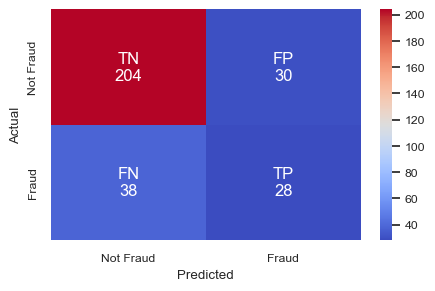

In [59]:
predict(grid_search_knn)

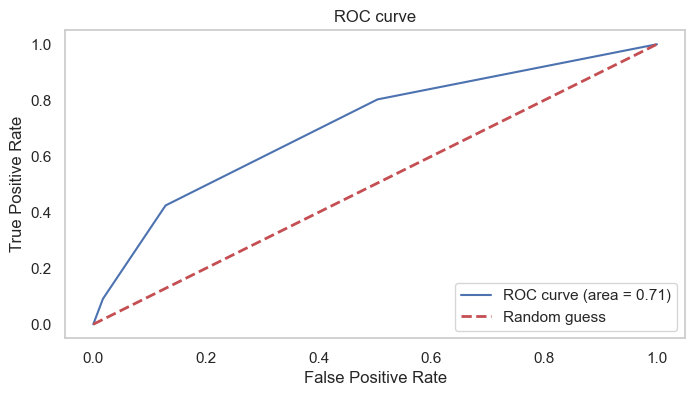

In [60]:
plot_roc(grid_search_knn, X_test, y_test)

#### **Models Comparison**

In [61]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Random Forest', 'XgBoost', 'Logistic Regression'],
    'Accuracy' : [0.77,0.83,0.57,0.82],
    'Recall' : [(0.87 + 0.42)/2,(0.84+0.8)/2,(0.47+0.91)/2,(0.86 + 0.67)/2],
    'F1-Score' : [(0.86 + 0.45)/2,(0.89+0.68)/2,(0.63+0.48)/2,(0.88 + 0.62)/2],
    'AUC' : [0.7071,0.8358,0.8538,0.7466]
})


models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,Recall,F1-Score,AUC
1,Random Forest,0.83,0.820,0.785,0.8358
3,Logistic Regression,0.82,0.765,0.750,0.7466
0,KNN,0.77,0.645,0.655,0.7071
2,XgBoost,0.57,0.690,0.555,0.8538


Based on the evaluation metrics for the fraud detection models, the Random Forest classifier emerged as the most effective model. It achieved the highest accuracy (83%), recall (82%), and F1-score (78.5%), indicating a strong overall performance in correctly identifying both fraudulent and non-fraudulent claims. Although XGBoost showed a higher AUC (0.8538), its low accuracy (57%) and F1-score (55.5%) suggest it may be overfitting or biased in prediction. Logistic Regression performed reasonably well with balanced metrics, making it a good baseline model. However, K-Nearest Neighbors (KNN) showed comparatively lower performance in all metrics.

Therefore, Random Forest is the most reliable and balanced model for detecting fraudulent insurance claims in this dataset.